In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
salesdata = pd.read_csv('BlackFriday.csv')

In [4]:
salesdata.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [20]:
a = salesdata['Product_Category_2'].unique()
b = salesdata['Product_Category_3'].unique()

print(sorted(a))
print(sorted(b))

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
[nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


Filling null values by 0. 

In [21]:
salesdata.fillna(value = 0, inplace = True)

In [22]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## Analysis

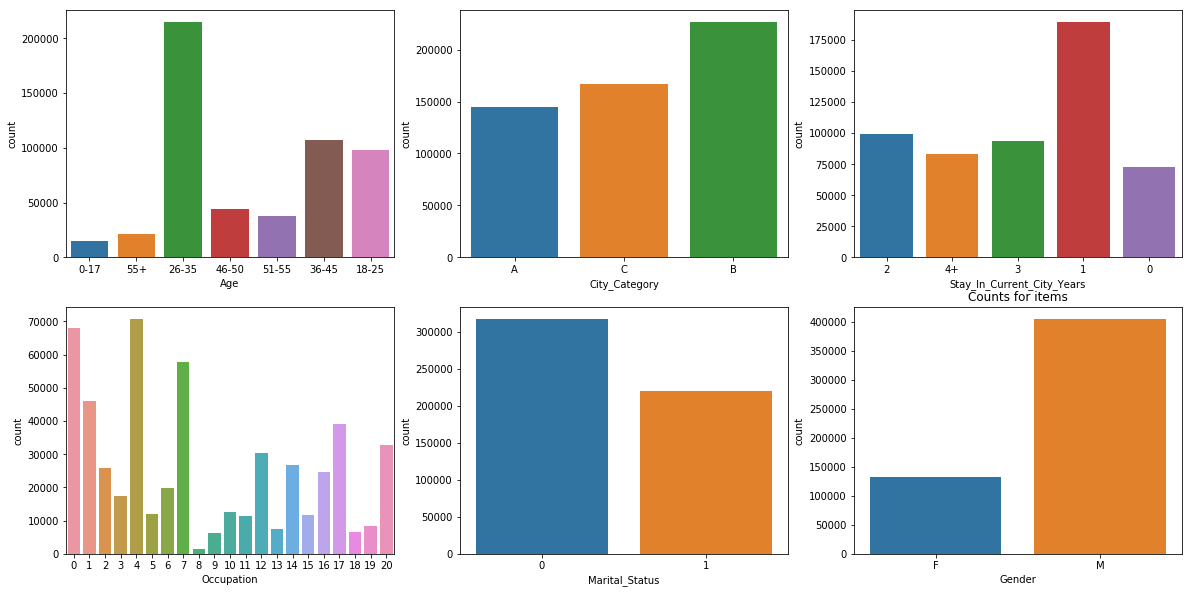

In [47]:
fig = plt.figure(figsize=(20,10))


ax11 = fig.add_subplot(231)
ax12 = fig.add_subplot(232)
ax13 = fig.add_subplot(233)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235)
ax23 = fig.add_subplot(236)

sns.countplot(salesdata['Age'], ax = ax11)
sns.countplot(salesdata['City_Category'], ax = ax12)
sns.countplot(salesdata['Stay_In_Current_City_Years'], ax = ax13)
sns.countplot(salesdata['Occupation'], ax = ax21)
sns.countplot(salesdata['Marital_Status'], ax = ax22)
sns.countplot(salesdata['Gender'], ax = ax23)

plt.title("Counts for items")

plt.show()

## Observations -
* Age group 26-35 buys the most items. 
* New residents specially those having 1 yr time in the city buys the most items
* Occupation 0, 4, 7 buy the most items
* Singles buy more items than Couples. 
* More female buys items than male. Possible maybe in couples its the females that go for shopping. 

In [174]:
#Average Shopping done by each user\
used_purchase_data = salesdata[['User_ID','Purchase']]
user_purchase_mean = used_purchase_data.groupby(['User_ID']).agg({max, min,np.mean, sum})

user_purchase_mean.columns = user_purchase_mean.columns.get_level_values(1)

user_purchase_mean['sum'] = user_purchase_mean['sum']/10**3

In [166]:
user_purchase_mean.head()

Purchase                             
             min          mean     sum    max
User_ID                                      
1000001     1057   9808.264706  333481  19219
1000002     3443  10662.539474  810353  20657
1000003     3646  11780.517241  341635  19631
1000004     3849  15845.153846  205987  19693
1000005     1938   7745.292453  821001  21021

In [167]:
user_purchase_mean.columns

MultiIndex(levels=[['Purchase'], ['min', 'mean', 'sum', 'max']],
           labels=[[0, 0, 0, 0], [0, 1, 2, 3]])

In [168]:
user_purchase_mean.columns = user_purchase_mean.columns.get_level_values(1)

In [169]:
user_purchase_mean.columns

Index(['min', 'mean', 'sum', 'max'], dtype='object')

In [170]:
user_purchase_mean['sum'] = user_purchase_mean['sum']/10**3

In [176]:
user_purchase_mean.head()

,min,mean,sum,max
User_ID,,,,
1000001,1057,9808.264706,333.481,19219
1000002,3443,10662.539474,810.353,20657
1000003,3646,11780.517241,341.635,19631
1000004,3849,15845.153846,205.987,19693
1000005,1938,7745.292453,821.001,21021


In [177]:
user_purchase_mean['sum'].max()

10536.783

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


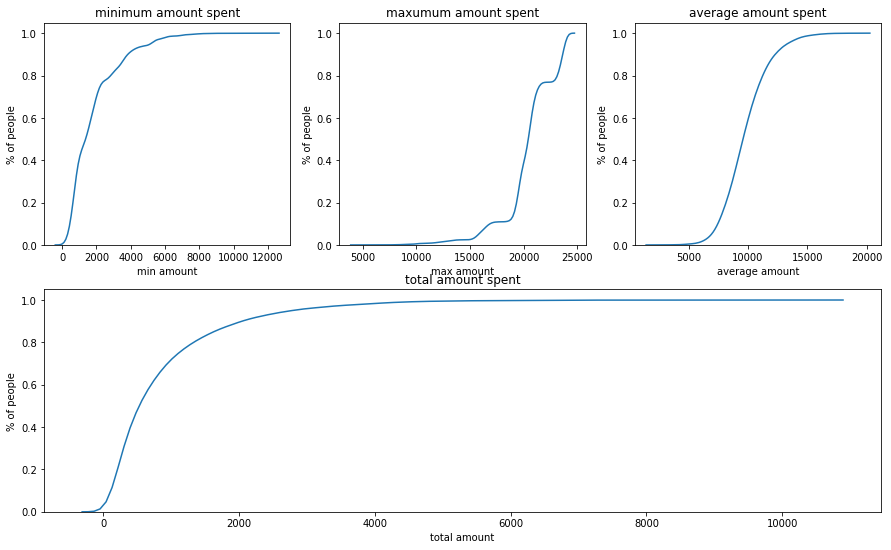

In [179]:
fig = plt.figure(figsize = (15,9))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(212)

axis_obj1 = sns.distplot(user_purchase_mean['min'], hist=False, kde_kws=dict(cumulative=True), ax = ax1)
axis_obj2 = sns.distplot(user_purchase_mean['max'], hist=False, kde_kws=dict(cumulative=True), ax = ax2)
axis_obj3 = sns.distplot(user_purchase_mean['mean'], hist=False, kde_kws=dict(cumulative=True), ax = ax3)
axis_obj4 = sns.distplot(user_purchase_mean['sum'], hist=False, kde_kws=dict(cumulative=True), ax = ax4)

axis_obj1.set(xlabel='min amount', ylabel='% of people', title = 'minimum amount spent')
axis_obj2.set(xlabel='max amount', ylabel='% of people', title = 'maxumum amount spent')
axis_obj3.set(xlabel='average amount', ylabel='% of people', title = 'average amount spent')
axis_obj4.set(xlabel='total amount', ylabel='% of people', title = 'total amount spent')

plt.show()

## Observation -
* These graphs help us understand the spending habbits of users. For instance -
    * Products worth less than 2500 rs appeal to 80% of the customers. 
    * 60% customers purchased atleast 1 item over Rs 20000.
    * 80% customers spend an average of over Rs 7500. 

## Action Items -
* Since 60% People are buying atleast 1 items in range [19000,21000], therefore this area can be explored. 